In [78]:
"""
OUTLINE
To Do
r/askhistorian
r/askscience

WEBSCRAPING
- reddit posts pull in. 100 per day

NLP MODELING
NLP II:
-tokenizser
-count vectorizer
-stop words
-stemming
-sentiment analysis
-pre-processing
n-gram
- grid search CV

X= features, message post
y = r/askhistorian or r/askscience

VISUALS:
- bar graph
- bar graph for ngrams
"""




'\nOUTLINE\nTo Do\nr/askhistorian\nr/askscience\n\nWEBSCRAPING\n- reddit posts pull in. 100 per day\n\nNLP MODELING\nNLP II:\n-tokenizser\n-count vectorizer\n-stop words\n-stemming\n-sentiment analysis\n-pre-processing\nn-gram\n- grid search CV\n\nX= features, message post\ny = r/askhistorian or r/askscience\n\nVISUALS:\n- bar graph\n- bar graph for ngrams\n'

In [3]:
import praw
import pandas as pd
import seaborn as sns
from datetime import date
from creds import *

pd.set_option('display.max_colwidth', None)


reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT,
    username=USERNAME,
    password=PASSWORD
)

# Pull Subreddit Data

In [295]:
def get_reddit_posts(my_subreddit):
    subreddit = reddit.subreddit(my_subreddit)

    # Adjust the limit as needed -- Note that this will grab the 25 most recent posts
    posts = subreddit.new(limit=1500)
    # posts = subreddit.top(limit=1500)
    

    data = []
    for post in posts:
        data.append([post.created_utc, post.title, post.selftext, post.subreddit])

    # Turn into a dataframe
    df = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
    df.to_csv(f'datasets/{my_subreddit}_{date.today()}.csv')
    return df.tail()

In [296]:
get_reddit_posts('askscience')

,created_utc,title,self_text,subreddit
664,1.697329e+09,Can a planet orbit a black hole without ripping apart?,Just wondering.,askscience
665,1.697342e+09,How are zero calorie sweeteners “zero calorie”?,"Third year Biochemistry student here. Wondering if it’s the shape or structure of the molecule so that the enzymes in glycolysis or the TCA cycle don’t recognize it, or if it’s just not metabolized correctly, or anything.",askscience
666,1.697336e+09,Why is the moon not lit up during an eclipse?,"I’ve been paying attention to the moon lately. I’ve notice that the moon alot of the time you can see it during the day time. You can see the craters and everything during the day time. \n\nSo my question is, if the moon doesn’t produce is own light and the sun is what give the moon the right amount of light so you can see it, how come during a solar eclipse the sun is right behind it but you can’t see any details of the moon? the moon was pitch black.",askscience
667,1.697348e+09,Do time crystals break continuous or discrete time translation symmetry?,"According to [Wikipedia](https://en.wikipedia.org/wiki/Time_crystal#Broken_symmetry_in_discrete_time_crystals_(DTC)) and many other sources (such as [this](https://iontrap.umd.edu/wp-content/uploads/2012/12/annurev-conmatphys-031119-050658.pdf) paper on page 2), DTCs break discrete time translation symmetry. However, I was watching [this](https://youtu.be/5l1KxgHH2Ek?feature=shared&t=487) PBS Space Time video that says that DTCs break continuous time translation symmetry while maintaining discrete time symmetry. I have two main questions:\n\n1. What's the different between the two?\n2. Is there a mistake in the PBS video?",askscience
668,1.697261e+09,How is hydrogen created in our universe?,"After learning that hydrogen is the most abundant and is the lightest element in the universe, my mind instantly started racing about how the inevitable movement of the universe is towards refinement. Idk if there’s a better word for it. I guess I’d like to know if it’s a matter of hydrogen being so abundant since the Big Bang, or if there’s some larger process that I don’t know of which leads to the abundance of hydrogen. \nThanks!",askscience


In [297]:
get_reddit_posts('askhistorians')

,created_utc,title,self_text,subreddit
988,1.708661e+09,What is the history of debate in modern style legislatures in relatively mature systems? How true is the narrative of it being ruined by modern crowd pleasing.,"The British Parliament and the English parliament from probably William III onwards, the Reichstag at the time of the HRE, the American Congress, the French Parliament after 1871, bodies like that. \n\nPeople like to imagine it like the theme park version of a wise statesman giving a moving speech on a vital issue that persuades everyone because they are just so right, waving their arms like a Roman Senator, and that it was merely a dilatory tactic, and that it was ruined by the camera in the chamber and the committee room making it a public spectacle and wasting time with no effort like in an American filibuster in the Senate and it is now all for getting likes on Twitter or something you can mail out.",AskHistorians
989,1.708660e+09,What was the way to Take a Castle?,What was generally the best way to capture a Medieval castle? Did those besieging the fortress have better luck with digging a tunnel or using siege machines (or other)?,AskHistorians
990,1.708660e+09,Was the Early Church Catholic?,Was first-century Christianity Catholic? How was early Christianity the same or different?,AskHistorians
991,1.708660e+09,"What is the difference between History and Historical Theology, and how can I become a professor of history?","Would anyone be able to give me a simple explanation of the difference between history and historical theology? Is Historical theology more theology than history? \n\nLastly, I know that there are fewer history faculty positions now than even in 2008. However, what pathway should a person take to teach history in college?",AskHistorians
992,1.708659e+09,What are some recommendations for the periodization of European history?,"Hello! \nI am reaching out to see if anyone has any recommendations on scholarly texts that give clear date ranges for the medieval, Renaissance, and early modern periods. In researching periodization, I have found several sources that problematize existing schema without proposing new date ranges, and others that propose widely varying breakdowns. As the assignation of beginning and end dates is somewhat arbitrary, no model is perfect, but periodization remains a practical tool of which I need to make use. I have to cite a reputable source for the dates I propose, so I'm hoping the European history buffs among us could make some suggestions. \nMy thanks in advance. \n–M",AskHistorians


In [298]:
# Combine askhistorian data 
df_hist_1 = pd.read_csv('datasets/askhistorians_2024-02-27.csv')
df_hist_2 = pd.read_csv('datasets/askhistorians_2024-03-03-1.csv')
df_hist_3 = pd.read_csv('datasets/askhistorians_2024-03-03.csv')


df_big_hist = pd.concat([df_hist_1, df_hist_2, df_hist_3], ignore_index=True)
df_big_hist.drop_duplicates(inplace=True)
df_big_hist.to_csv('datasets/askhistorians_mega.csv')

In [299]:
# Combine askscience data 
df_sci_1 = pd.read_csv('datasets/askscience_2024-02-27.csv')
df_sci_2 = pd.read_csv('datasets/askscience_2024-03-03-1.csv')
df_sci_3 = pd.read_csv('datasets/askscience_2024-03-03.csv')


df_big_sci = pd.concat([df_sci_1, df_sci_2, df_sci_3], ignore_index=True)
df_big_sci.drop_duplicates(inplace=True)
df_big_sci.to_csv('datasets/askscience_mega.csv')

In [8]:
#combine and shuffle both subreddit

df = pd.concat([df_big_sci, df_big_hist], ignore_index=True)
df.sample(frac=1).to_csv('datasets/subreddits.csv')

NameError: name 'df_big_sci' is not defined

In [9]:
df = df.sample(frac=1)

NameError: name 'df' is not defined

In [10]:
df = pd.read_csv('datasets/subreddits.csv')

# EDA and Cleaning

In [11]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,created_utc,title,self_text,subreddit
0,565,565,1.699044e+09,Does the earth get more homogeneous over time?,My wife and I are rock hounds and during a recent purchase of a large (very expensive) statement pierce I started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? Or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nNote: I may or may not have been a little high when this thought crossed my mind,askscience
1,4206,878,1.603809e+09,"Even though much is lost, the overwhelming majority of public knowledge on Western Phoenician civilization is centred on Carthage and it’s empire. But what do we know about the inner workings of other large Punic polities like Utica in North Africa and Agadir/Gadir in Spain?","I’ve studied Punic civilization quite a lot, and for obvious reasons Carthage predominates the scholarship massively. But while I know that Gadir is older and had a very important temple to Melqart, and that Utica was the second largest Phoenician/Punic settlement in North Africa (I believe), I don’t really know much else about them or other non-Carthaginian Punic settlements. What do we know of their governments, people, traditions, economies, and the like?\n\nHoly carp three awards for asking a question? Thanks community!",AskHistorians
2,4452,126,1.709433e+09,What did European travellers and missionaries to Asia think about Chinese movable type printing press?,Were they surprised to find that Gutenberg had been preceded by the Chinese (even though Gutenberg's press was different and more efficient than the former)? Did they ever hypothesize about Gutenberg being somehow influenced by this Asian technology?\n\nThanks in advance.,AskHistorians


In [12]:
df.isna().sum()

Unnamed: 0.1       0
Unnamed: 0         0
created_utc        0
title              0
self_text       1505
subreddit          0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df = df.drop(columns='Unnamed: 0')

In [15]:
df['created_utc'] = pd.to_datetime(df['created_utc'])

In [16]:
df['text'] = df['self_text']

In [17]:
df["full_text"] = df["title"] + " " + df["self_text"]


In [18]:
df.sample(10)
# df.iloc[86]

,Unnamed: 0.1,created_utc,title,self_text,subreddit,text,full_text
2251,913,1970-01-01 00:00:01.567385147,How do super storms like Hurricane Dorian affect marine life as the storm travels through the area? Do they affect deep sea creatures?,"Edit: Thank you, anonymous do-gooder for the gold! They say it is better to give than to receive, but this is my first gold so I gotta say this feels pretty darn good!",askscience,"Edit: Thank you, anonymous do-gooder for the gold! They say it is better to give than to receive, but this is my first gold so I gotta say this feels pretty darn good!","How do super storms like Hurricane Dorian affect marine life as the storm travels through the area? Do they affect deep sea creatures? Edit: Thank you, anonymous do-gooder for the gold! They say it is better to give than to receive, but this is my first gold so I gotta say this feels pretty darn good!"
2612,4821,1970-01-01 00:00:01.709077562,"Why are the French considered ""white""?","This question comes with baggage and is bases on some loose assumptions that may be true. When I ask why the French are considered white, I mean why are they considered white to the far right in countries like Germany, the United Kingdom, and the United States. It seems a common reason why for example the Irish or Polish were not considered white was because they were Catholic and thus co sidereal inferior. So why then are the French exempted and viewed widely as white despite being very catholic themselves? Perhaps this is based on a false premise that race and religion are connected in ways that they are not, but I can't see why Irish immigrants wouldn't be seen as white otherwise (excluding the Ulster Irish, who were considered white because they were protestant). Obviously I am asking this moreso in reference to Germanic White supremacist in anglophone and Germanic countries , because I am sure the French do regard themselves as white. Does it have something to do with the franks?",AskHistorians,"This question comes with baggage and is bases on some loose assumptions that may be true. When I ask why the French are considered white, I mean why are they considered white to the far right in countries like Germany, the United Kingdom, and the United States. It seems a common reason why for example the Irish or Polish were not considered white was because they were Catholic and thus co sidereal inferior. So why then are the French exempted and viewed widely as white despite being very catholic themselves? Perhaps this is based on a false premise that race and religion are connected in ways that they are not, but I can't see why Irish immigrants wouldn't be seen as white otherwise (excluding the Ulster Irish, who were considered white because they were protestant). Obviously I am asking this moreso in reference to Germanic White supremacist in anglophone and Germanic countries , because I am sure the French do regard themselves as white. Does it have something to do with the franks?","Why are the French considered ""white""? This question comes with baggage and is bases on some loose assumptions that may be true. When I ask why the French are considered white, I mean why are they considered white to the far right in countries like Germany, the United Kingdom, and the United States. It seems a common reason why for example the Irish or Polish were not considered white was because they were Catholic and thus co sidereal inferior. So why then are the French exempted and viewed widely as white despite being very catholic themselves? Perhaps this is based on a false premise that race and religion are connected in ways that they are not, but I can't see why Irish immigrants wouldn't be seen as white otherwise (excluding the Ulster Irish, who were considered white because they were protestant). Obviously I am asking this moreso in reference to Germanic White supremacist in anglophone and Germanic countries , because I am sure the French do regard themselves as white. Does i

In [19]:
df['subreddit'] = df['subreddit'].map({'askscience':0, 'AskHistorians':1})

# Baseline

In [20]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [21]:
df['subreddit'].value_counts(normalize=True) 

subreddit
1    0.578244
0    0.421756
Name: proportion, dtype: float64

In [22]:
ps = PorterStemmer()

df['stemmed'] = [ps.stem(x) for x in df['full_text']]

In [23]:
# Get data



X = df['stemmed']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [24]:
# Preprocessing

In [25]:
sw = stopwords.words('english') + ['\n', 'history', 'science', 'com', 'www', 'askscience', 'askhistorians', ]


cvec = CountVectorizer(stop_words=sw, ngram_range=(1,2))
cvec.fit(X)

X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df = pd.DataFrame(X_train_cv.todense(), columns=cvec.get_feature_names_out())


In [26]:
X_train_df.head()

,00,00 00,00 18,00 19,00 30,00 cest,00 edt,00 et,00 html,00 minute,...,박순정 xiaojie,유용애,유용애 two,𝑔𝑟,𝑔𝑟 𝜌𝑠,𝜌𝑓,𝜌𝑓 18𝜂,𝜌𝑓 9𝜂,𝜌𝑠,𝜌𝑠 𝜌𝑓
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


AttributeError: 'DataFrame' object has no attribute 'row'

In [27]:
cvec.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])>

In [28]:
topwords = X_train_df.sum().sort_values(ascending=False).head(15)

<BarContainer object of 15 artists>

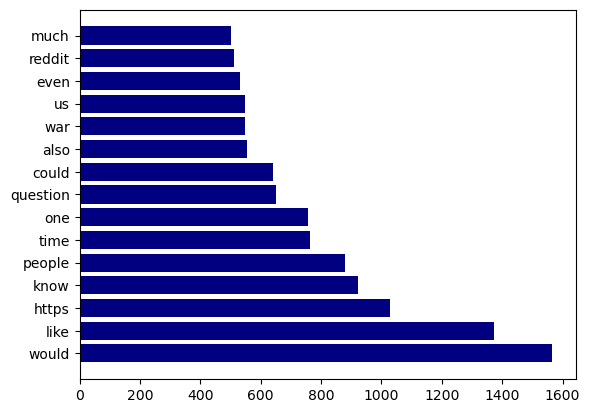

In [29]:
plt.barh(topwords.index, topwords, color='navy')

In [30]:
ps = PorterStemmer()

df['stemmed'] = [ps.stem(x) for x in df['full_text']]

In [31]:
wn = WordNetLemmatizer()
df['lemmatize'] = [wn.lemmatize(x) for x in df['full_text']]

In [32]:
df.head(3)

,Unnamed: 0.1,created_utc,title,self_text,subreddit,text,full_text,stemmed,lemmatize
0,565,1970-01-01 00:00:01.699043638,Does the earth get more homogeneous over time?,My wife and I are rock hounds and during a recent purchase of a large (very expensive) statement pierce I started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? Or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nNote: I may or may not have been a little high when this thought crossed my mind,0,My wife and I are rock hounds and during a recent purchase of a large (very expensive) statement pierce I started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? Or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nNote: I may or may not have been a little high when this thought crossed my mind,Does the earth get more homogeneous over time? My wife and I are rock hounds and during a recent purchase of a large (very expensive) statement pierce I started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? Or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nNote: I may or may not have been a little high when this thought crossed my mind,does the earth get more homogeneous over time? my wife and i are rock hounds and during a recent purchase of a large (very expensive) statement pierce i started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nnote: i may or may not have been a little high when this thought crossed my mind,Does the earth get more homogeneous over time? My wife and I are rock hounds and during a recent purchase of a large (very expensive) statement pierce I started wondering if people (or creatures of some sort) a billion years from now will have the same variety of mineral and crystal deposits to reap from? Or will the constant motion of plates tectonics with subduction and divergent/convergent boundaries keep mixing up minerals and elements until all bedrock stone is homogeneous and all the same effectively making mineral deposits that aren’t formed using water extinct? \n\nNote: I may or may not have been a little high when this thought crossed my mind
1,4206,1970-01-01 00:00:01.603808968,"Even though much is lost, the overwhelming majority of public knowledge on Western Phoenician civilization is centred on Carthage and it’s empire. But what do we know about the inner workings of other large Punic polities like Utica in North Africa and Agadir/Gadir in Spain?","I’ve studied Punic civilization quite a lot, and for obvious reasons Carthage predominates the scholarship massively. But while I know that Gadir is older and had a very important temple to Melqart, and that Utica was the second largest Phoenician/Punic settlement in North Africa (I believe), I don’t r

In [69]:

# X = df['full_text']
# X = df['stemmed']
X = df['lemmatize']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
sw = stopwords.words('english') + ['\n', 'history', 'science', 'com', 'www', 'askscience', 'askhistorians', ]
cvec = CountVectorizer(stop_words=sw)

pipe = Pipeline([
    ('cvec', cvec),
    ('nb', MultinomialNB()),
    # ('bnb', BernoulliNB())
    
])

params = {
    'cvec__binary': [False, True],
    'cvec__min_df': [1,2,3],
    'cvec__max_df': np.linspace(.5,1, 5),
    'cvec__ngram_range': [(1,1), (1,2)],
}

gs = GridSearchCV(pipe, params, cv=5, n_jobs=8)

In [61]:
# pipe.get_params()
import numpy as np
np.linspace(.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [62]:
pipe.get_params()


{'memory': None,
 'steps': [('cvec',
   CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                               'ourselves', 'you', "you're", "you've", "you'll",
                               "you'd", 'your', 'yours', 'yourself', 'yourselves',
                               'he', 'him', 'his', 'himself', 'she', "she's",
                               'her', 'hers', 'herself', 'it', "it's", 'its',
                               'itself', ...])),
  ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'its',
                             'itself', ...]),
 'nb': MultinomialNB(),
 

In [42]:
# pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [43]:
# pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.9622641509433962)

In [71]:
gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('nb', MultinomialNB())]),
             n_jobs=8,
             param_grid={'cvec__binary': [False, True],
                         'cvec__max_df': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [72]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9891646277525341, 0.960167714884696)

In [73]:
gs.best_params_

{'cvec__binary': False,
 'cvec__max_df': 0.5,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1)}

In [ ]:
###
df